In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.drop(columns=['gender','race/ethnicity','parental level of education','lunch'], axis = 1, inplace = True)
df.head()

,test preparation course,math score,reading score,writing score
0,none,72,72,74
1,completed,69,90,88
2,none,90,95,93
3,none,47,57,44
4,none,76,78,75


In [7]:
df.rename(columns = {'test preparation course':'course_taken','math score':'math_score', 'reading score':'reading_score', 'writing score':'writing_score'}, inplace = True)
df.head()

,course_taken,math_score,reading_score,writing_score
0,none,72,72,74
1,completed,69,90,88
2,none,90,95,93
3,none,47,57,44
4,none,76,78,75


In [10]:
df['course_taken']=df['course_taken'].apply(lambda x: 1 if x == 'completed' else 0)

In [11]:
df.head()

,course_taken,math_score,reading_score,writing_score
0,0,72,72,74
1,1,69,90,88
2,0,90,95,93
3,0,47,57,44
4,0,76,78,75


In [13]:
df.isnull().sum()

,0
course_taken,0
math_score,0
reading_score,0
writing_score,0


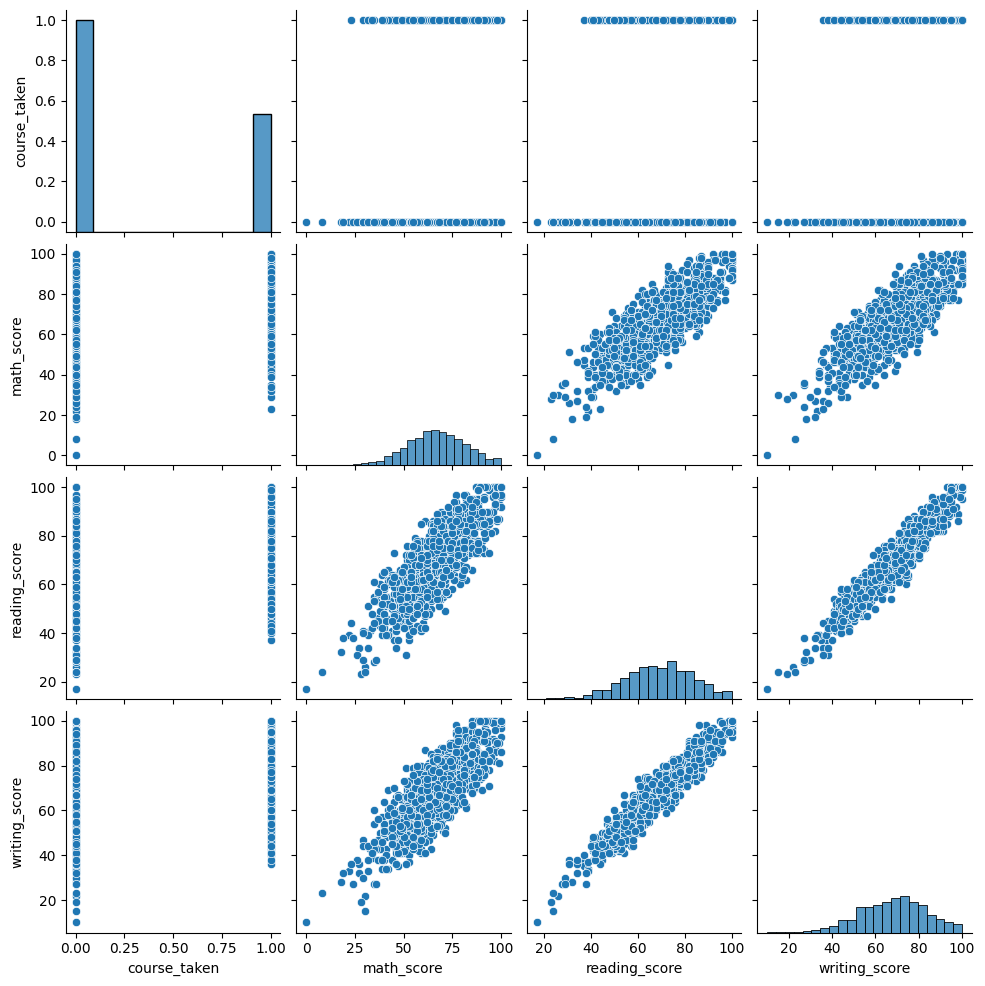

In [14]:
sns.pairplot(df)

In [15]:
df.corr()

,course_taken,math_score,reading_score,writing_score
course_taken,1.000000,0.177702,0.241780,0.312946
math_score,0.177702,1.000000,0.817580,0.802642
reading_score,0.241780,0.817580,1.000000,0.954598
writing_score,0.312946,0.802642,0.954598,1.000000


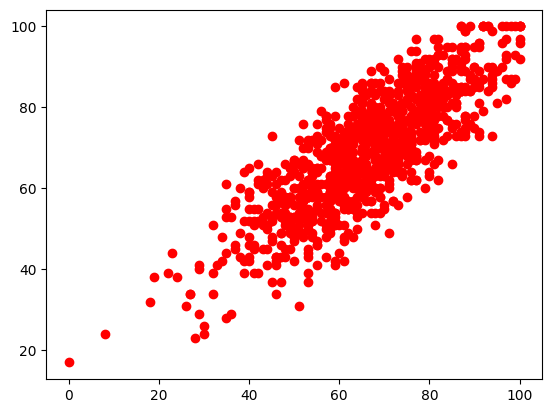

In [19]:
plt.scatter(df['math_score'],df['reading_score'],color = 'red')

In [21]:
df.drop('course_taken',axis = 1,inplace=True)

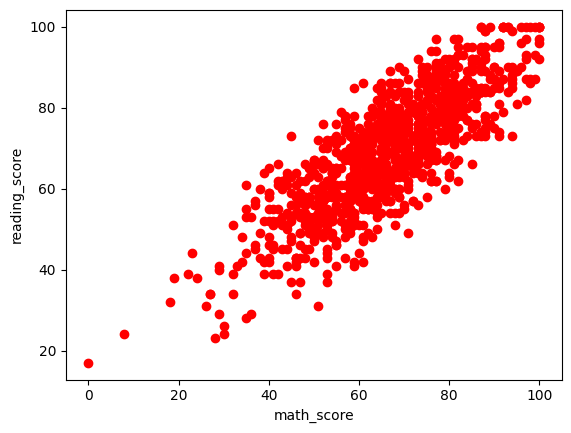

In [22]:
plt.xlabel('math_score')
plt.ylabel('reading_score')
plt.scatter(df['math_score'],df['reading_score'],color = 'red')

In [23]:
df.head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [34]:
#independent and dependent feature
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(y)


0      74
1      88
2      93
3      44
4      75
       ..
995    95
996    55
997    65
998    77
999    86
Name: writing_score, Length: 1000, dtype: int64


In [28]:
#Train Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

<Axes: xlabel='math_score', ylabel='writing_score'>

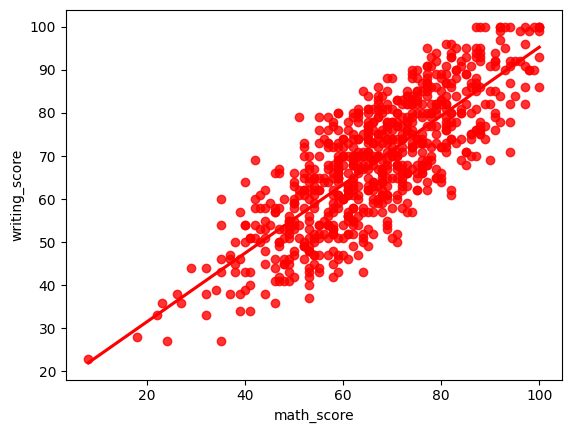

In [32]:
#plot data into linear regression model fit
sns.regplot(x = x_train['math_score'],y = y_train,ci = None,color = 'red')

In [33]:
#standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
#cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(lr,x_train,y_train,scoring = 'neg_mean_squared_error',cv = 3)
print(validation_score)

[-19.63986448 -21.01442023 -18.23323771]


In [37]:
np.mean(validation_score)

np.float64(-19.629174137913896)

In [40]:
y_pred = lr.predict(x_test)


In [49]:
#performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('mse:',mean_squared_error(y_test,y_pred))
print('mae:',mean_absolute_error(y_test,y_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score:',r2_score(y_test,y_pred))
print('adjusted_r2_score',1-(1-r2_score(y_test,y_pred))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print("coefficient:",lr.coef_)

mse: 22.82551664263739
mae: 3.76630353746482
rmse: 4.777605743742088
r2_score: 0.9113775419232885
adjusted_r2_score 0.9106599511696308
coefficient: [ 1.10288538 13.2646639 ]


In [51]:
#OLS Linear Regression
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y_train,x_train).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          writing_score   R-squared (uncentered):                   0.041
Model:                            OLS   Adj. R-squared (uncentered):              0.038
Method:                 Least Squares   F-statistic:                              15.88
Date:                Sun, 23 Mar 2025   Prob (F-statistic):                    1.77e-07
Time:                        18:26:17   Log-Likelihood:                         -4237.7
No. Observations:                 750   AIC:                                      8479.
Df Residuals:                     748   BIC:                                      8489.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1029      4.327      0.255      0.799      -7.392       9.598
x2            13.2647      4.327      3.066      0.002       4.770      21.759
==============================================================================
Omnibus:                        2.669   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.263   Jarque-Bera (JB):                2.326
Skew:                           0.037   Prob(JB):                        0.313
Kurtosis:                       2.737   Cond. No.                         3.12
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

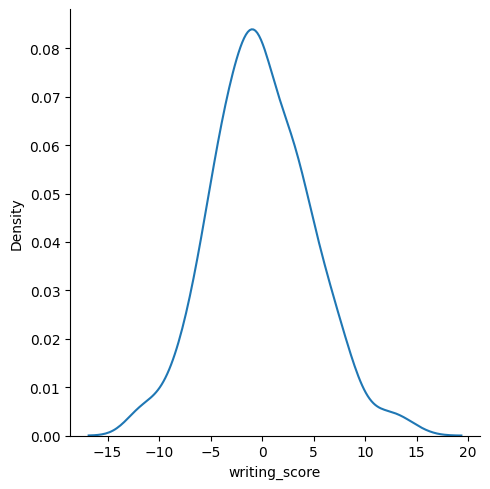

In [53]:
#residuals
residuals = y_test - y_pred
sns.displot(residuals,kind = 'kde')

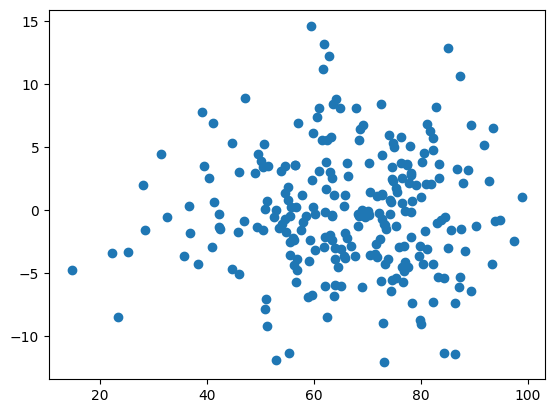

In [55]:
plt.scatter(y_pred,residuals)

In [59]:
lr.predict(sc.transform([[76,78]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([77.01921846])